<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/tapi-logo-small.png" />

This notebook free for educational reuse under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/).

Created by [Firstname Lastname](https://) for the 2022 Text Analysis Pedagogy Institute, with support from the [National Endowment for the Humanities](https://neh.gov), [JSTOR Labs](https://labs.jstor.org/), and [University of Arizona Libraries](https://new.library.arizona.edu/).

For questions/comments/improvements, email author@email.address.<br />
____

# `NLP with spaCy` `3`

This is lesson `3` of 3 in the educational series on `Natural Language Processing (NLP)`. This notebook is intended `to teach the basics of NLP and the spaCy library.`. 

**Audience:** `Teachers` / `Learners` / `Researchers`

**Use case:** `Tutorial`

`Include the use case definition from [here](https://constellate.org/docs/documentation-categories)`

**Difficulty:** `Beginner`

`Beginner assumes users are relatively new to Python and Jupyter Notebooks. The user is helped step-by-step with lots of explanatory text.`

`Intermediate assumes users are familiar with Python and have been programming for 6+ months. Code makes up a larger part of the notebook and basic concepts related to Python are not explained.`

`Advanced assumes users are very familiar with Python and have been programming for years, but they may not be familiar with the process being explained.`

**Completion time:** `90 minutes`

**Knowledge Required:** 
```
* Python basics (variables, flow control, functions, lists, dictionaries)
```

**Knowledge Recommended:**
```
* Basic file operations (open, close, read, write)
```

**Learning Objectives:**
After this lesson, learners will be able to:
```
1. Understand how to solve an NLP problem, specifically information extraction
2. Understand how to find data
3. Understand how to structure data
4. Understand how to develop a spaCy Pipeline
```
**Research Pipeline:**
```
N/A
```
___

# Required Python Libraries
`List out any libraries used and what they are used for`
* [spaCy](https://spacy.io/) for performing [Natural Language Processing (NLP)](https://docs.constellate.org/key-terms/#nlp).

## Install Required Libraries

In [29]:
### Install Libraries ###

# Using !pip installs
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md
# Using %%bash magic with apt-get and yes prompt

     --------------------------------------- 12.8/12.8 MB 59.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


c:\Users\wma22\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\wma22\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\wma22\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\wma22\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


     --------------------------------------- 42.8/42.8 MB 31.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


c:\Users\wma22\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\wma22\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\wma22\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\wma22\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
### Import Libraries ###
import spacy
from collections import defaultdict

c:\Users\wma22\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\wma22\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\wma22\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\wma22\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Introduction

In this notebook, we will learn how to use spaCy to solve a real-world problem. We will specifically use spaCy's NER output to identify characters in a text and, more importantly, understand where those characters appear in the text.

# The Problem

Today we are beginning with a problem. We are a student in a literature course and we have been tasked with identifying characters in the book `Alice in Wonderland`. The teacher also wants us to note when each character appears in the book and when we don't see them again. Accuracy isn't important, just a general ballpark is fine. The teacher also does not appear concerned that we learn the content of the book. They simply want us to understand the role of characters in the book and their temporal arrival and departure from a story.

Unlike our peers, we have an older sibling who has had this teacher before and we know that we will have do this every week for the next 8 months. We have two options at this point, we can either invest a lot of time repeating the same task over-and-over each week or we can leverage automation. Automation is the process by which we use a system to complete a repetitive task by developing a system of rules. Since this is a Python course on spaCy, let's use spaCy to develop a solution that works on `Alice in Wonderland` during our first week of this class. Our goal is to develop a workflow that, with simple modifications, can be used on other texts.

While this is a fun backstory, it is important to note a few things. This is the trade-off with automation. We relinquish control over the material and the output so that we can analyze large quantities of data efficiently. Repetitive tasks that would take months to do can be done in minutes. It is important to understand this benefit--time--and, more importantly, the drawback--accuracy.

This notebook will focus on the process of data curation so that we can use matplotlib to generate a figure like the one below. The focus of this notebook is not on how to generate the figure, rather how to prepare the data so that a figure like this can be generated.


![alice graph](../images//alice.JPG)

## Preparing the Pipeline and Model

First, let's load up our pipeline. At the beginning of this notebook, we downloaded the `en_core_web_sm` pipeline and the `en_core_web_md` pipeline. In this notebook, we will be using the medium model, but you can easily substitute these and have similar results.

Let's load up the `en_core_web_md` model now.

In [4]:
nlp = spacy.load("en_core_web_md")

As we can see, the pipeline looks identical to the `en_core_web_sm` pipeline. The chief difference lies in its size which is the result of the `medium` model storing vectors. We will learn more about these in Week 3.

In [5]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

Now that we have our model loaded, let's start working with our text from The Project Gutenburg. Our text is `Alice in Wonderland`. Let's load the text and print off the first 500 characters to see what it looks like.

*Note*

I have saved this text locally so that you do not need to download it for this course. You can access it the `data` subfolder under the name `alice.txt`. We are using `../data/alice.txt` in the cell below because we have to move back to our root directory before navigating into the data subfolder. The `../` allows us to move back one directory and do this.

In [8]:
with open("../data/alice.txt", "r", encoding="utf-8") as f:
    text = f.read()
print(text[:500])

The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located


As we can see, we have loaded the text correctly, but we have a problem. We have a lot of the Gutenburg library header data. We don't want that, so let's go ahead and clean this up. In this text, the body begins after `CHAPTER XII.   Alice’s Evidence` which marks the end of the table of contents. We can use split to split the text at this point and `[1]` to grab index `1`, or everything that comes after this point. We can then use `.strip()` to remove the trailing and leading whitespace and line breaks from the text.

In [9]:
body = text.split("CHAPTER XII.   Alice’s Evidence", 1)[1].strip()
print(body[:500])

CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure of
making a daisy-chain 


Our text, however, is not entirely clean. We still have still have the long terms-of-service agreement at the bottom. Let's remove this so we don't accidentally include any of this material in our process.

In [10]:
print(body[-500:])

 by copyright in
the U.S. unless a copyright notice is included. Thus, we do not
necessarily keep eBooks in compliance with any particular paper
edition.

Most people start at our website which has the main PG search
facility: www.gutenberg.org

This website includes information about Project Gutenberg-tm,
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.


In most cases, we can remove the footer of a Gutenburg text with the following command. This does the same thing as the code above, it splits the text at the start of the terms and then grab the `[0]` index, or the body that comes before this point. Again, we use `.strip()` to clean the trailing and leading whitespaces and line breaks.

In [11]:
body = body.split("*** END OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***")[0].strip()

Now that we have our entire text somewhat cleaned, it's time to think about how we want to analyze the way characters appear in a text over time. We could isolate characters by sentence, paragraph, or even chapters. For this lesson I've opted for chapter. Each chapter in this text begins with the word `CHAPTER`. This means we can easily automate the separation of each of the twelve chapters by splitting the text at this point.

In [13]:
chapters = body.split('CHAPTER ')[1:]
len(chapters)

12

Notice, that we have 12 chapters. This is because the word `CHAPTER` in all caps does not appear anywhere else in the text except as a chapter heading. It's important to identify pattern like this in your text to understand how to automate the splitting of the text into consistent components.

In [14]:
print(chapters[0][:500])

I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure of
making a daisy-chain would be


# Finding the People in the Text

We can now start to use this to identify all the people in spaCy. Let's first try and isolate just all the person entities. We can do this with the following code. This allows us to iterate over each chapter. We use enumerate here which creates an integer for as during the loop. We provide two arguments: `chapters` and `1`. The first argument is the thing that we want to iterate over and the second argument is the number at which we want to start counting. Because chapters do not begin with `0`, rather `1`, it's best if we start the same way.

```python
for i, chapter in enumerate(chapters, 1):
```

Next, we create a doc container for each chapter by passing it to `nlp`. We can see that in this line here:

```python
    doc = nlp(chapter)
```

Next, we want to iterate over each entity in `doc.ents`. We can use a nested `for` loop to achieve this.

```python
        for ent in doc.ents:
```

Since we are only interested in grabbing the entities that are people, we want to create a conditional where we only grab the entities whose `label_` is `PERSON`. We can do that with this condition:

```python
            if ent.label_ == 'PERSON':
```

Finally, if that condition is met, then we want to append that entity's text to a list called `people` which we have created outside of the loop. We can do that by appending the `ent.text` to the `people` list.

```python
            people.append(ent.text)
```

Now that all of that is done, we can remove all duplicates in our `people` list by converting our `people` list to a `set` and back to a `list` with this line:

```python
people = list(set(people))
```

And then we can print off the length of the the new list as well as the entire list.

In [15]:
people = []
for i, chapter in enumerate(chapters, 1):
    doc = nlp(chapter)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            people.append(ent.text)
people = list(set(people))
print(len(people))
print(people)

46
['Cheshire Puss', 'Gryphon', 'Dinn', 'Tortoise', 'Lobster', 'Cheshire', 'Lacie', 'Hatter', 'Brandy', 'Ma', 'Shakespeare', 'Turtle Soup_', 'Lobster Quadrille', 'William\nthe Conqueror', 'Pigeon', 'Eaglet', 'Alice\n', 'William_', 'Shark', 'Edwin', 'Pat', 'Hare', 'Tillie', 'Hjckrrh', 'Derision', 'William the Conqueror', 'Pennyworth', 'I.\nDown the Rabbit-Hole', 'Bill', 'Ada', 'Mary Ann', 'Dinah', 'William', 'Said', 'Alice', 'Mouse', 'Jack', 'Mabel', 'Queen', 'Miss', 'Dormouse', 'Elsie', 'Soo', 'Longitude', 'Panther', 'Edgar']


As we can see, we have `46` unique people (some of which are overlaps). Let's take this one step further. We will do precisely the same thing, but also store where a character begins and ends in each chapter. This way, we can understand how a character appears throughout the text.

First, we need a dictionary to store all of our data using `defaultdict`. There is a more efficient way to do this in Python (see below), but for readability for those newer to Python, I have opted for this approach.

This line of code initializes an empty dictionary `person_mention_positions` which will store the positions of each mention of a person's name in each chapter.

```python
# Initialize an empty dictionary to store the start and end positions of each person's mention in each chapter.
person_mention_positions = {}
```

Next, we need to again iterate over each chapter.  Again, we use `enumerate` to iterate over our data.

```python
for chapter_number, chapter_text in enumerate(chapters, 1):
```

Again, we process each chapter individual through the `nlp` pipeline.

```python
    processed_chapter = nlp(chapter_text)
```

Again, we iterate over each entity in each chapter.

```python
    for entity in processed_chapter.ents:
```

This is where our code changes slightly. I noticed that sometimes spaCy flags chapter headings as a PERSON. I added a separate rule to make sure a `.` does not appear in the entity text.

```python
        if entity.label_ == "PERSON" and "." not in entity.text:
```

Next, we ahve this block of code. here, we check if the name of the person (which we get by calling `entity.text.strip()`) is not already a key in our dictionary. If it is not, we add it to the dictionary with an empty dictionary as its value. Again, `defaultdict` is the better way to do this step (see below).

```python
            if entity.text.strip() not in person_mention_positions:
                person_mention_positions[entity.text] = {}
```

Here, we check if the chapter number is not already a key in the sub-dictionary associated with the person's name. If it is not, we add it to the sub-dictionary with an empty list as its value. Again, here we are better off using `lambda` and `defaultdict` to do this step, but these are more intermediate Python concepts/approaches.

```python
            if chapter_number not in person_mention_positions[entity.text.strip()]:
                person_mention_positions[entity.text.strip()][chapter_number] = []
```

Finally, we append the start and end character positions of the entity in the text to the list associated with the chapter number in the sub-dictionary associated with the person's name. The start and end positions are stored as a tuple.

```python
            person_mention_positions[entity.text.strip()][chapter_number].append((entity.start_char, entity.end_char))
```

By the end of this script, `person_mention_positions` will contain the positions of each mention of a person's name in each chapter, organized by person and chapter. This can be used for further analysis or for creating an index of person mentions. I have added extra spacing in the code block below to make it easier to read. I have also changed the normal conventions for naming things. It is my hope that this makes the code a little easier to understand. Instead of `doc`, I used `processed_chapter`. Instead of `ent`, I used `entity`. This is something I am experimenting with as a teaching device, but let me know if it adds to the confusion and I'll fix the notebook or provide an alternative.

In [16]:
person_mention_positions = {}

for chapter_number, chapter_text in enumerate(chapters, 1):

    processed_chapter = nlp(chapter_text)

    for entity in processed_chapter.ents:

        if entity.label_ == "PERSON" and "." not in entity.text:

            if entity.text.strip() not in person_mention_positions:

                person_mention_positions[entity.text] = {}

            if chapter_number not in person_mention_positions[entity.text.strip()]:
                
                person_mention_positions[entity.text.strip()][chapter_number] = []

            person_mention_positions[entity.text.strip()][chapter_number].append((entity.start_char, entity.end_char))

As note above, the better approach to this is to use things like `defaultdict` and `lambda`. These are things you typically do not encounter until intermediate Python. I am providing this section of the code for those who understand how `defaultdict` and `lambda` work, but it is beyond the scope of this class. I kept the syntax consistent with the example above (unconventional variable names) so that those who are interested can more easily compare the two.

In [14]:

from collections import defaultdict

person_mention_positions = defaultdict(lambda: defaultdict(list))
for chapter_number, chapter_text in enumerate(chapters, 1):
    processed_chapter = nlp(chapter_text)
    for entity in processed_chapter.ents:
        if entity.label_ == 'PERSON':
            person_mention_positions[entity.text][chapter_number].append((entity.start_char, entity.end_char))


# Analyzing our Output

Let's examine what our output from this process looks like. We will only examine a smaller character so that we can more easily see what it looks like. First, let's look at the characters available to us. These were stored as keys in our main dictionary.

In [19]:
person_mention_positions.keys()

dict_keys(['Alice', 'Longitude', 'Dinah', 'Ada', 'Mabel', 'Mouse', 'William the Conqueror', 'William\nthe Conqueror', 'Edwin', 'Edgar', 'William', 'Eaglet', 'Shakespeare', 'Ma', 'Mary Ann', 'Pat', 'Bill', 'Brandy', 'Jack', 'William_', 'Pigeon', 'Cheshire', 'Queen', 'Cheshire Puss', 'Hatter', 'Hare', 'Dormouse', 'Elsie', 'Lacie', 'Tillie', 'Miss', 'Hjckrrh', 'Tortoise', 'Gryphon', 'Derision', 'Lobster Quadrille', 'Said', 'Dinn', 'Lobster', 'Shark', 'Panther', 'Turtle Soup_', 'Soo', 'Pennyworth'])

These are our ~40 characters. Let's pick `William`. William has a few different entries in the dictionary, but we will only work with the way he appears as `William` strictly. In a downstream task (which we will explore next week), we can improve upon this output and insure that all variants of William are linked to the same entity.

In [18]:
person_mention_positions["William"]

{3: [(2249, 2256), (2282, 2289)], 5: [(2868, 2875), (3052, 3059)]}

Here we can see that this dictionary has 2 keys. These are integers that correspond to chapters. Each of these keys has a value that is a list.

In [20]:
person_mention_positions["William"][3]

[(2249, 2256), (2282, 2289)]

This list contains tuples which contain two pieces of data: the start and end characters (letters) for each occurrence of that entity in the chapter. This complex data structure, therefore, let's us understand in which chapters  specific character appears and specifically where in each chapter. We can use this data to write our report and provide a general idea about where each character appears in a story. We must remember, that our results are not going to be perfect. If we want higher accuracy, we could use the `en_core_web_lg` model or, even better, the `en_core_web_trf` model. This will take slightly longer to run, but our results would improve.

# How to Visualize the Data

Full disclosure, I had help creating this graph from Stackoverflow and input from my colleagues. I do not claim to be great at producing data visualizations. I typically work with data. Nevertheless, I thought I'd share this method for graphing the data and merely assist in creating the visualizations for data in publications.

The figure below allows us to visualize where a character appears in the text across each chapter. The density of the plot indicates how frequently a character appears in that specific chapter. The characters are organized from first appearance and then density, meaning a character who has few appearances but appears in chapter 1, will be lower on the graph, while a character with many appearances later in the text will appear higher in the graph.

The nice thing about this image is that we can fairly easily identify the main character of the story and even when certain figures emerge and exit. We can also make some general deductions about how characters interact in the book. We can see that the `Hatter` and the `Hare` frequently appear in identical chapters together. While this cannot be used as evidence of a specific relationship, it can be used as evidence for potential correlation and something worth of exploration.

I am providing this graph here as a reference point for others interested in using it. As you can see in `day-03-livy`, I have modified the graph slightly to work better with larger character lists and texts with more chapters.

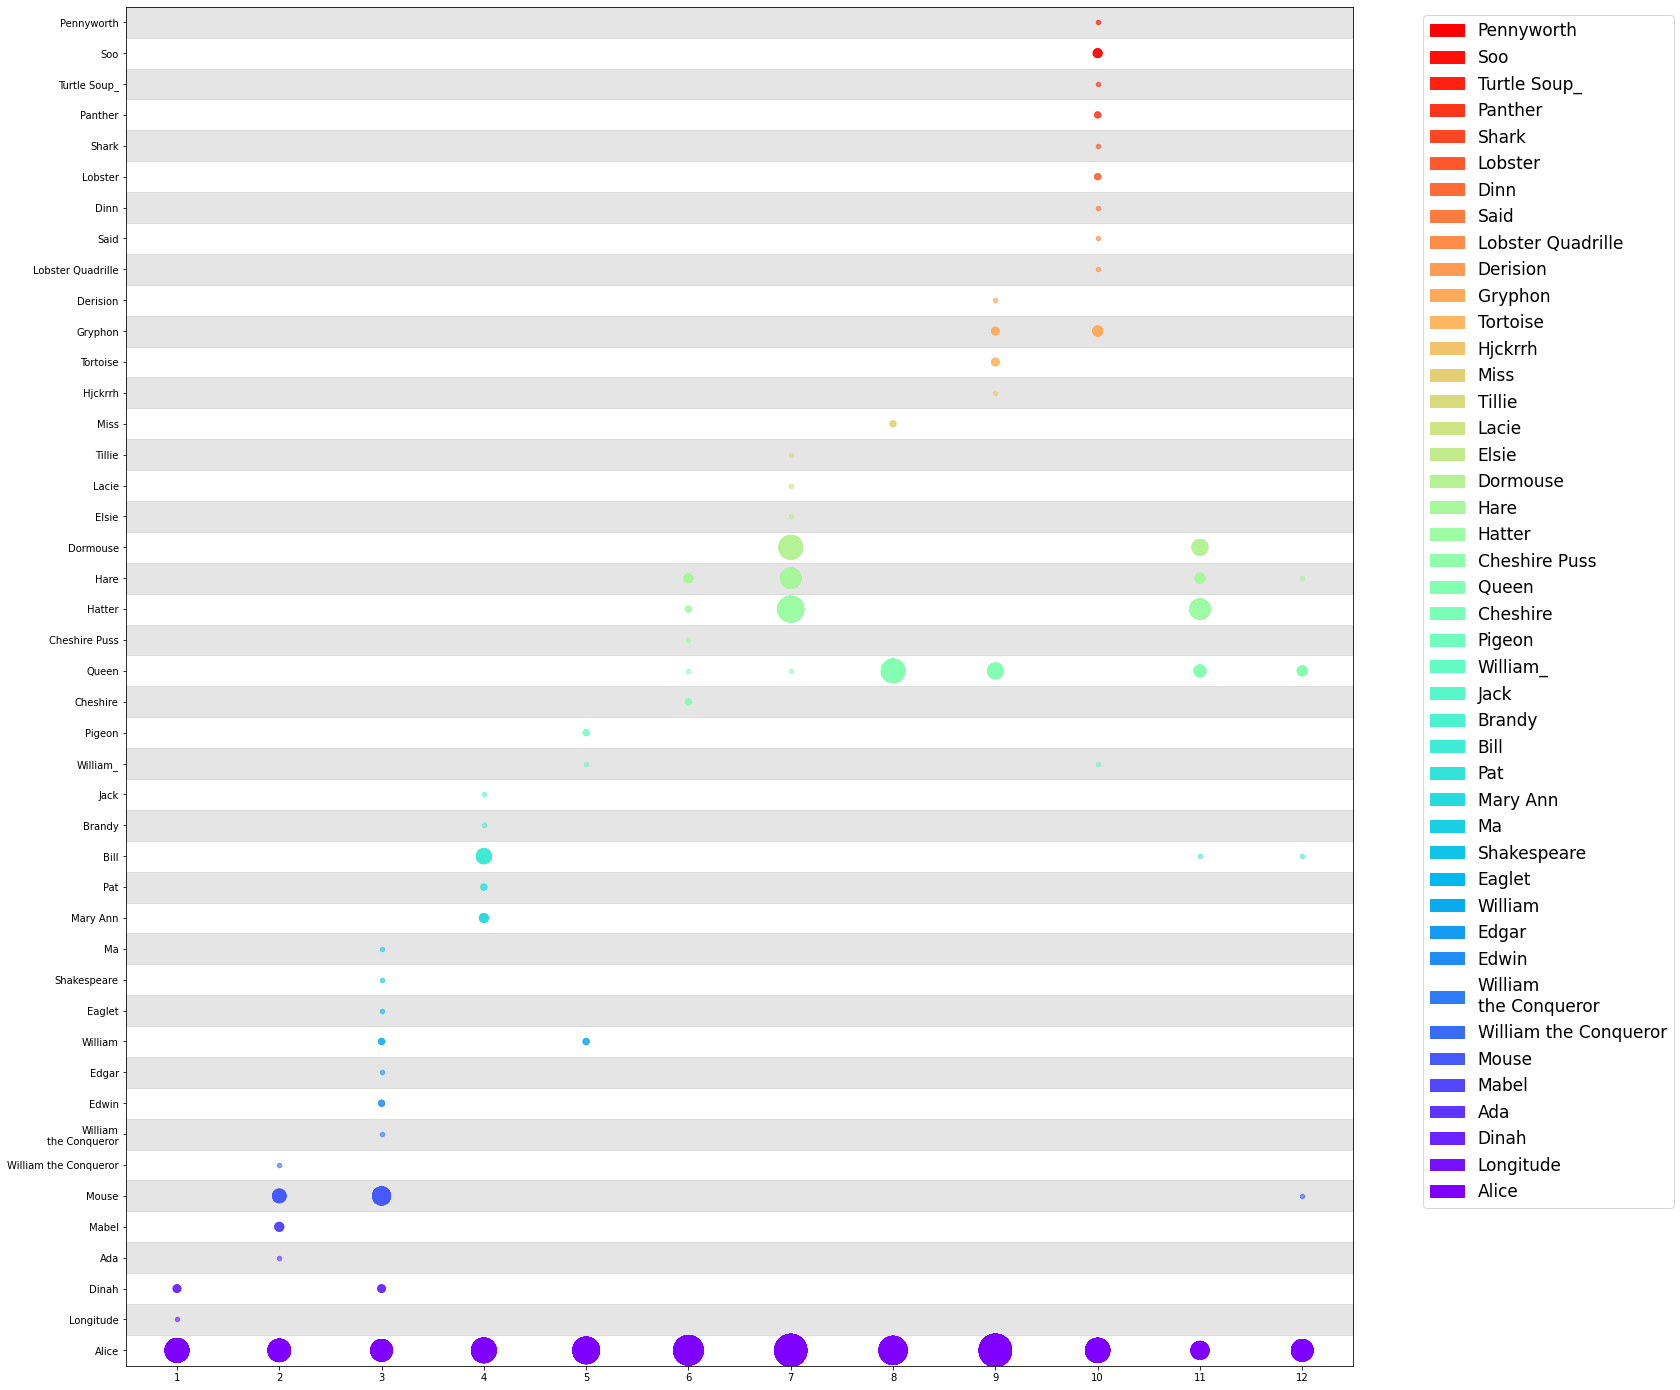

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Define the figure size
fig, ax = plt.subplots(figsize=(22, 25))

# Set the global font size
plt.rcParams.update({'font.size': 17})

# Get a list of unique entities and create a color for each entity
entities = list(person_mention_positions.keys())
num_entities = len(entities)
colors = plt.cm.rainbow(np.linspace(0, 1, num_entities))

# Create a numeric representation of the chapters
c = {i: i for i in range(1, 13)}  # assuming chapters numbered from 1 to 12


# Add alternating background colors
for i in range(1, num_entities+1):
    if i % 2 == 0:
        ax.fill_betweenx(y=[i-0.5, i+0.5], x1=0.5, x2=max(c.values())+0.5, color='gray', alpha=0.2)

# For holding patches for creating custom legend
patches = []

for color, (entity, entity_chapters) in zip(colors, person_mention_positions.items()):
    for chapter, positions in entity_chapters.items():
        y = [entities.index(entity)+1] * len(positions) # start y-axis at 1
        x = [c[chapter]] * len(positions)
        size = [20 * len(positions) for _ in positions]
        ax.scatter(x, y, s=size, color=color, alpha=0.6)
    
    # Create patch for each entity
    patches.append(mpatches.Patch(color=color, label=entity))

# Set the y-ticks and y-ticklabels to the entity names
ax.set_yticks(range(1, num_entities+1))
ax.set_yticklabels(entities)

# Set the x-ticks and x-ticklabels to the chapter numbers
ax.set_xticks(range(1, max(c.values())+1))
ax.set_xticklabels(range(1, max(c.values())+1))

# Set the x-limits and y-limits of the plot
ax.set_xlim([0.5, max(c.values())+0.5]) # start x-axis at 1
ax.set_ylim([0.5, num_entities+0.5]) # start y-axis at 1

# Add custom legend outside the plot at the right side
plt.legend(handles=patches[::-1], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
